In [1]:
#%pip install imageio == 2.4.1
#%pip install gym
#%pip install pygame
#%pip install opencv-python
#%pip install matplotlib

In [2]:
# Setup Environment
import sys
sys.path.append("../")
sys.path.append("../source")

import gym
import numpy as np
from gym.wrappers.monitoring.video_recorder import VideoRecorder
from IPython.display import HTML
from source.dyna_q_agent import DynaQAgent
from source.utils import *


test_dyna_q_agent passed!


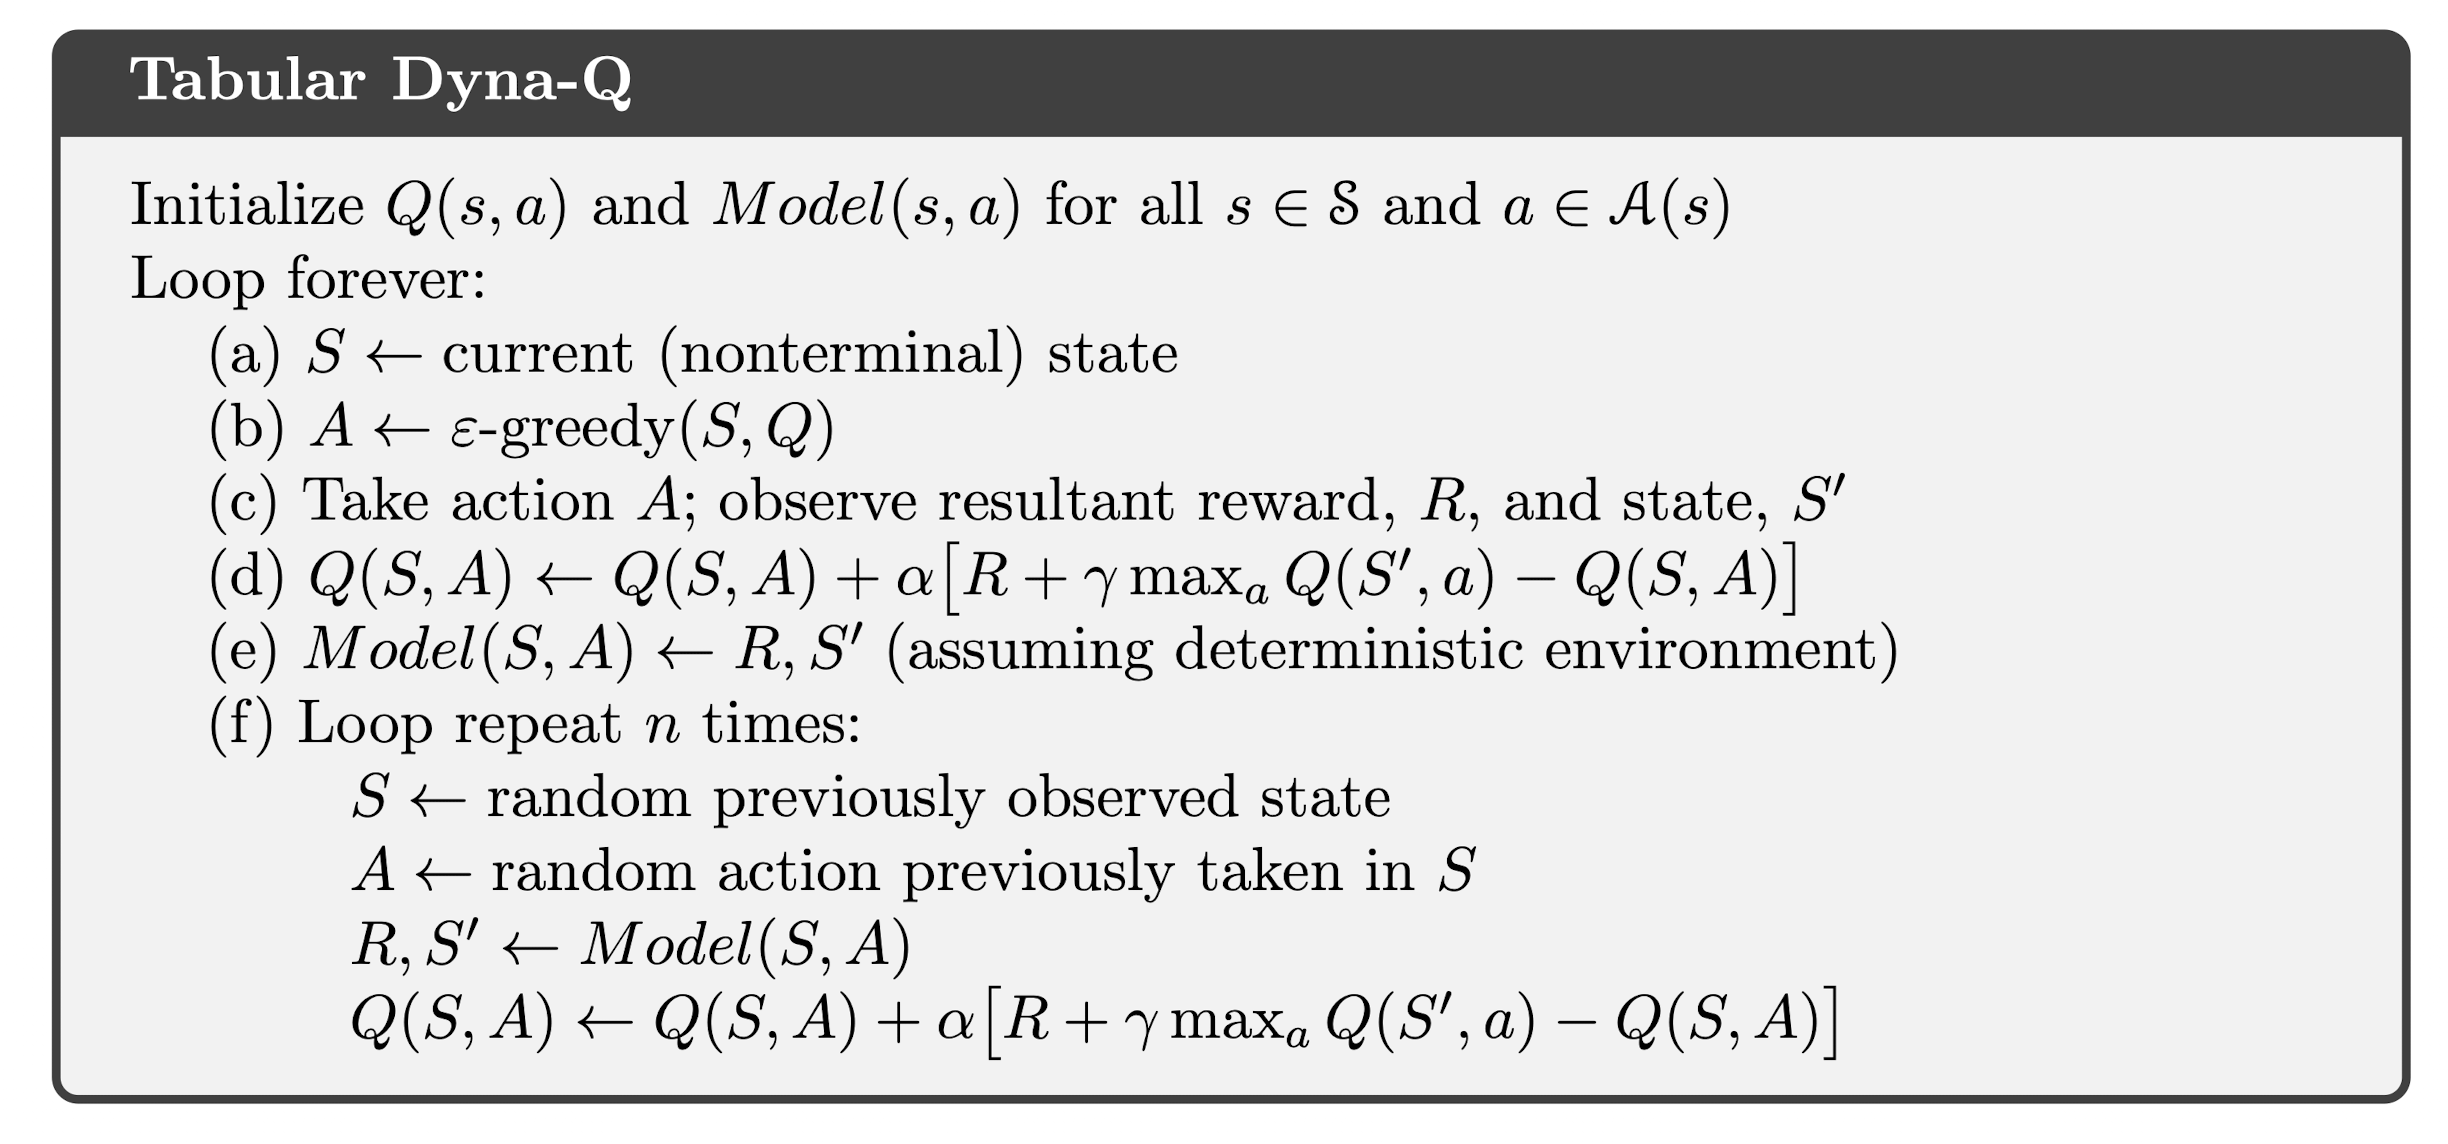

step: 10000, lr: 0.7247796636779303, total reward: 63.0, avarge success rate: 0.0063, avarage reward per step: 0.0001199710811742645
step: 20000, lr: 0.5253055608810939, total reward: 276.0, avarge success rate: 0.0213, avarage reward per step: 0.00039809073228095336
step: 30000, lr: 0.3807307877435458, total reward: 953.0, avarge success rate: 0.0677, avarage reward per step: 0.0011977777320228088
step: 40000, lr: 0.2759459322926006, total reward: 2155.0, avarge success rate: 0.1202, avarage reward per step: 0.0020478726958779924
step: 50000, lr: 0.20000000000032403, total reward: 4122.0, avarge success rate: 0.1967, avarage reward per step: 0.003373879307399341
step: 60000, lr: 0.1449559327358209, total reward: 6845.0, avarge success rate: 0.2723, avarage reward per step: 0.004654174649799101
step: 70000, lr: 0.10506111217638898, total reward: 10198.0, avarge success rate: 0.3353, avarage reward per step: 0.005547819045471341
step: 80000, lr: 0.07614615754883253, total reward: 14323.

100%|██████████| 10000/10000 [00:09<00:00, 1024.83it/s]


Success rate = 0.7159


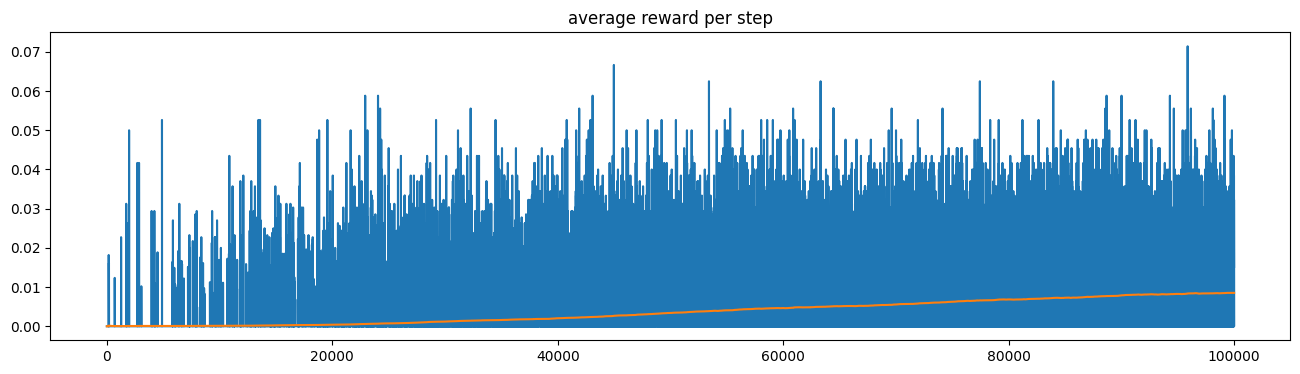

In [19]:
# Policy Eval
# Params
max_episode = 100000
video_path = "../video/dyna_q.mp4"
random_seed = 101

# Initialize
history = []
total_reward = 0
report_interval = max_episode // 10
# set random seeds
rng = np.random.default_rng(random_seed)
np.random.seed(random_seed)
# epsilon decay
epsilon_schedule = create_decay_schedule(max_episode)
lr_schedule = create_decay_schedule(max_episode)

# Create Environment.
#env = gym.make('Taxi-v3')
# using render_mode=rgb_array so that video recording works
env = gym.make('FrozenLake-v1', desc=None, map_name="8x8",
               is_slippery=True, render_mode='rgb_array')
env.np_random = rng

# Create Agent
agent = DynaQAgent(
    state_space=env.observation_space,
    action_space=env.action_space,
    discount_rate=0.95,
    epsilon=1.0,
    learning_rate=0.1,
    agent_type='q_learning',
    planning_steps=0
)

# Start Learning
for i in range(max_episode):
    reward, steps = agent.play_episode(env, epsilon=epsilon_schedule[i])
    history.append(reward / steps)
    total_reward += reward
    if i % report_interval == 0 and i != 0:
        print(
            f"step: {i}, epsilon: {epsilon_schedule[i]}, total reward: {total_reward}, avarge success rate: {np.sum([x > 0 for x in history[-report_interval:-1]])/report_interval}, avarage reward per step: {np.mean(history[-report_interval:-1])}")
print(f"\nrewarding episodes: {total_reward}")

# For off policy learning only: get greedy policy (no exploration)
agent._policy = get_epsilon_greedy_policy_from_action_values(agent._Q)
# Run Eval
success_rate = estimate_success_rate(agent, env, 10000)
print(f"Success rate = {success_rate}")
# play last episode with video recording
#agent.play_episode(env, learning=False, video_path=video_path)

plot_history(history)
# html=render_mp4(video_path)
# HTML(html)


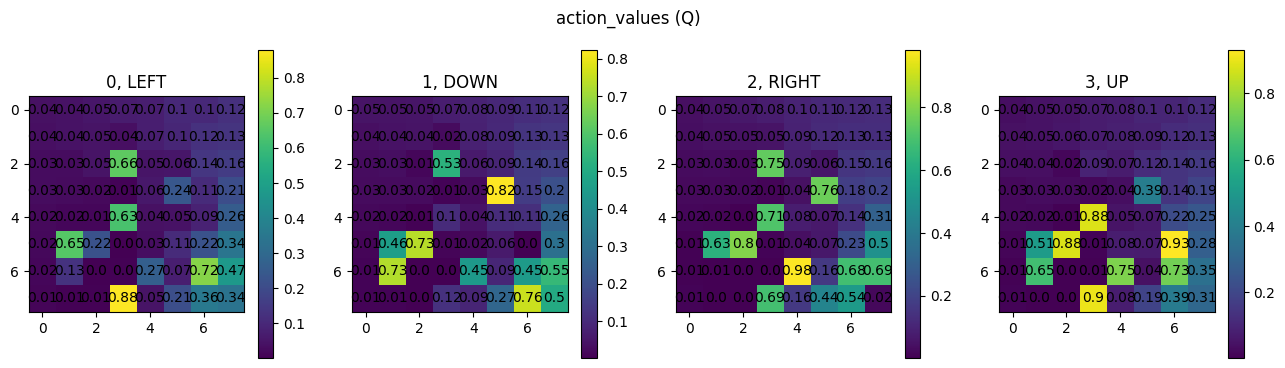

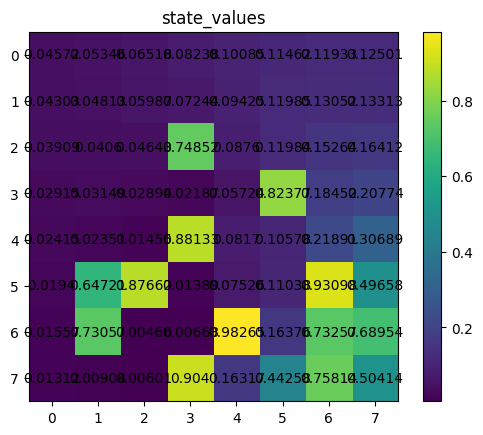

In [14]:
show_state_action_values(agent, 'frozen_lake_8x8')